<a href="https://colab.research.google.com/github/ju-sants/Desafio-DNC-analise-dados-e-modelagem/blob/main/Desafio_4_Regress%C3%A3o_para_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4:
***Construindo um modelo
de Regressão para marketing***





> **importações**



In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from random import randint

> **Carregamento**

In [ ]:
MKT = pd.read_csv('MKT.csv', sep=',')



---



> **Passo 1: Análise exploratória, descritiva e entendimento dos dados**



1.1   Análise Descritiva



In [ ]:
MKT.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [ ]:
MKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
MKT[MKT.isnull().any(axis=1)]

,youtube,facebook,newspaper,sales


In [ ]:
MKT[MKT.isna().any(axis=1)]

,youtube,facebook,newspaper,sales


In [ ]:
MKT.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


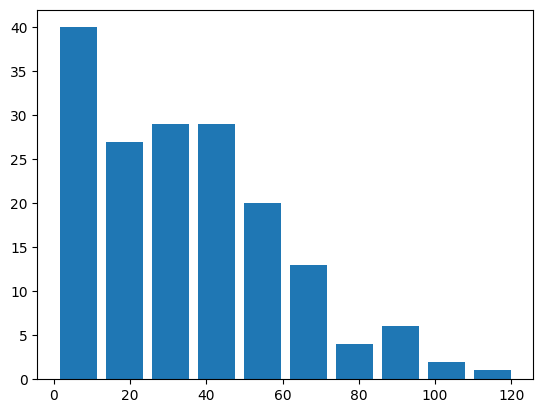

In [ ]:
plt.hist(MKT['newspaper'], rwidth=0.8);

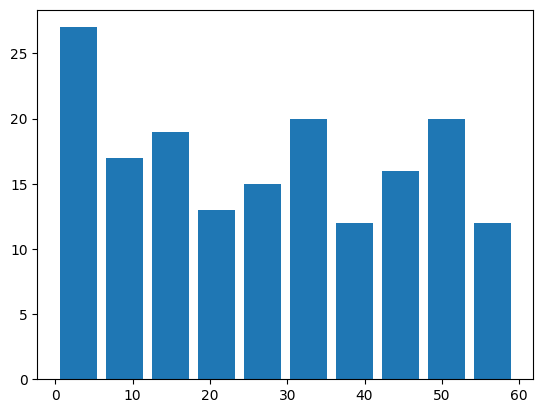

In [ ]:
plt.hist(MKT['facebook'], rwidth=0.8);

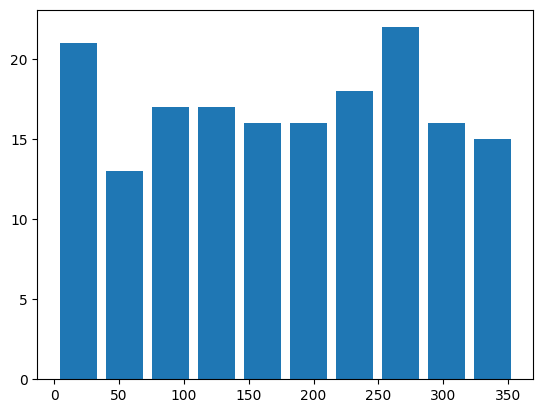

In [ ]:
plt.hist(MKT['youtube'], rwidth=0.8);

*as análises nos dizem que por mais que **NEWSPAPER** tenha um crescimento correlativo com vendas de 25% apenas; ainda tem mais registros com investimentos e, registros com investimentos altos de até $ 120,00 reais, enquanto o máximo de **FACEBOOK** é $ 59,00 reais. Percebemos tambem que o investimento na plataforma youtube é alto, merecido. porém até 22 registros tem um investimento entre 10 e 30 reais.*



---



1.2 Análise Exploratória

In [ ]:
MKT.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

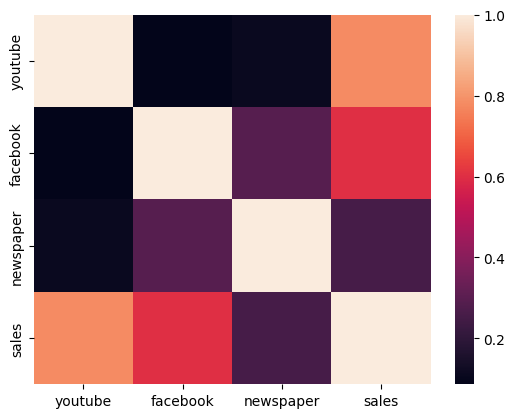

In [ ]:
sns.heatmap(MKT.corr())

*Em primeira instância, percebemos que os investimentos no **YOUTUBE** lideram o retorno em vendas, quanto mais o investimento na plataforma cresce mais as vendas cresem. Cerca de 70%. Seguido do **FACEBOOK** com uma taxa de crescimento em vendas de cerca de 60%. E em último lugar **NEWSPAPER** com 25% de crescimento.*





---



1.3 Entendimento dos dados

**Nessa primeiro contato e entendimento dos dados chegamos a conclusão de que a empresa deveria focar mais na distribuição correta de seus recursos para marketing, focando nas plataformas youtube e facebook, e deixando newspaper como algo a ser investido pouco e em segundo plano.**



---



> **Passo 2: Modelagem**

2.1 Dividindo os dados entre Variáveis independentes (x) e a variável dependente (y), e as massas de treino e teste com 70% para treino.

In [ ]:
x = MKT[['youtube', 'facebook', 'newspaper']]
y = MKT['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)



---



2.2 Criando e Treinando o modelo

In [ ]:
LinearMKT = LinearRegression()
LinearMKT.fit(x_train, y_train)

LinearRegression()



---



2.3 Fazendo predições e avaliando modelo

In [ ]:
y_pred = LinearMKT.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'R²: {r2:.2f}')

R²: 0.88


2.4 Testando o modelo e acuracidade.

    Nesse tópico o que realizo nada mais é do que extrair uma linha aleatória do dataset,
    passar os valores das variáveis independentes (x) reais para o modelo,
    e calcular a diferença entre o resultado real e o predito, gerando a acuracidade.

In [ ]:
linha_aleatoria = MKT.iloc[randint(0, 171)]
linha_aleatoria

,102
youtube,318.24
facebook,3.48
newspaper,51.60
sales,15.24


In [ ]:
x_test_acur = [
    [318.24, 3.48, 51.60]
]
y_test_acur = 15.24

In [ ]:
y_test_acur_pred = LinearMKT.predict(x_test_acur)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
lista = [y_test_acur_pred, y_test_acur]
print(f'Real: {y_test_acur}\nPredito: {y_test_acur_pred[0]:.2f}\n
Acuracidade de: {100 - ((y_test_acur_pred / y_test_acur) * 100 - 100)[0]:.2f}%')

Real: 15.24
Predito: 18.70
Acuracidade de: 77.27%
